In [1]:
%matplotlib inline
import matplotlib as mpl
plt = mpl.pyplot
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0
import numpy as np
import utils

In [3]:
# Load data
# I named it differently just to type faster
x_train, y_train, x_test, y_test = utils.get_training_data(0.2, onehot=0)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(np.sum(y_train)/len(y_train), np.sum(y_test)/len(y_test))

(16000, 1000) (16000,) (4000, 1000) (4000,)
0.5043125 0.5095


In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
n_estimators = 2000
learning_rate = 0.04
dt1 = DecisionTreeClassifier(max_depth=1)
dt2 = DecisionTreeClassifier(max_depth=2)
ada1 = AdaBoostClassifier(base_estimator=dt1, n_estimators=n_estimators, 
                        learning_rate=learning_rate)
ada2 = AdaBoostClassifier(base_estimator=dt2, n_estimators=n_estimators, 
                        learning_rate=learning_rate)

In [34]:
ada1.fit(x_train, y_train)
ada2.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.04, n_estimators=2000, random_state=None)

In [29]:
from sklearn.metrics import zero_one_loss
def plot_ada_hist(ada, title):
    ada_acc = np.zeros((n_estimators,))
    for i, y_pred in enumerate(ada.staged_predict(x_test)):
        ada_acc[i] = 1-zero_one_loss(y_pred, y_test)

    ada_acc_train = np.zeros((n_estimators,))
    for i, y_pred in enumerate(ada.staged_predict(x_train)):
        ada_acc_train[i] = 1-zero_one_loss(y_pred, y_train)

    plt.figure(dpi=300)
    plt.plot(np.arange(n_estimators) + 1, ada_acc, label='AdaBoost Test Accuracy')
    plt.plot(np.arange(n_estimators) + 1, ada_acc_train, label='AdaBoost Train Accuracy')
    plt.legend()
    plt.title(title)
    plt.show()
    plt.clf()

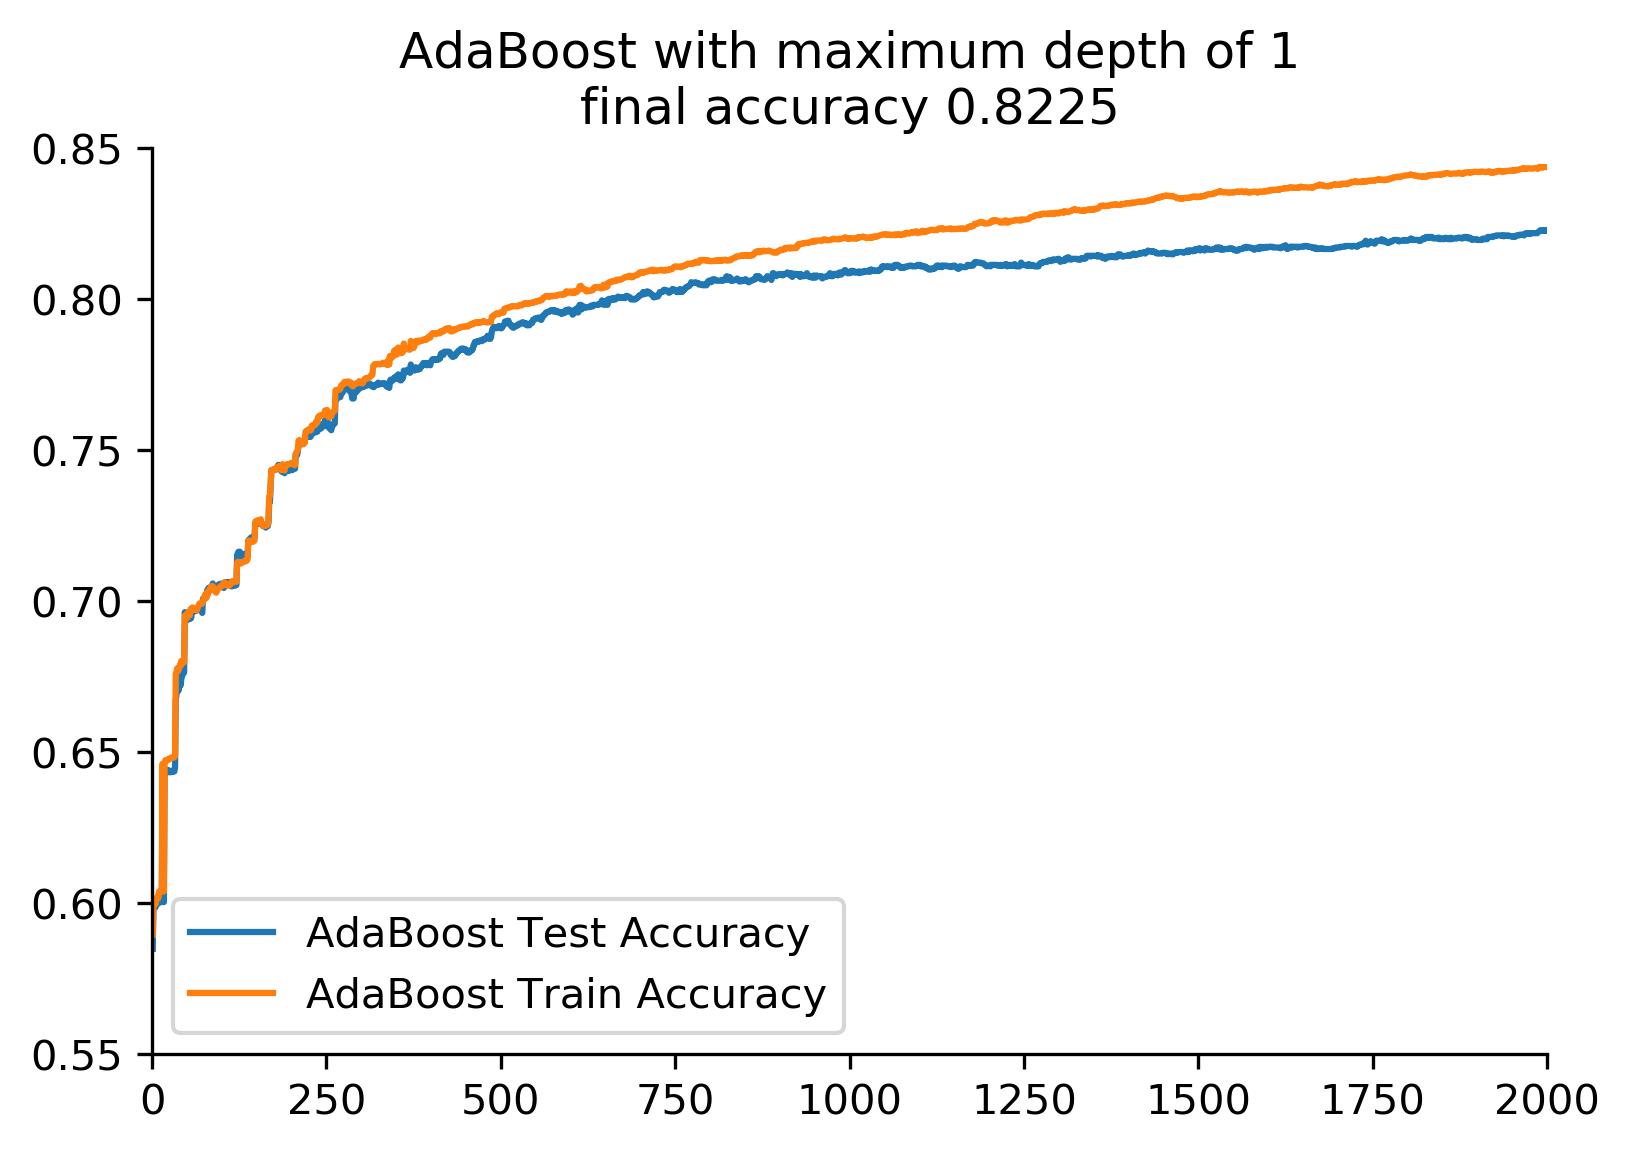

In [38]:
plot_ada_hist(ada1, 'AdaBoost with maximum depth of 1\nfinal accuracy %.4f'
             %ada1.score(x_test, y_test))

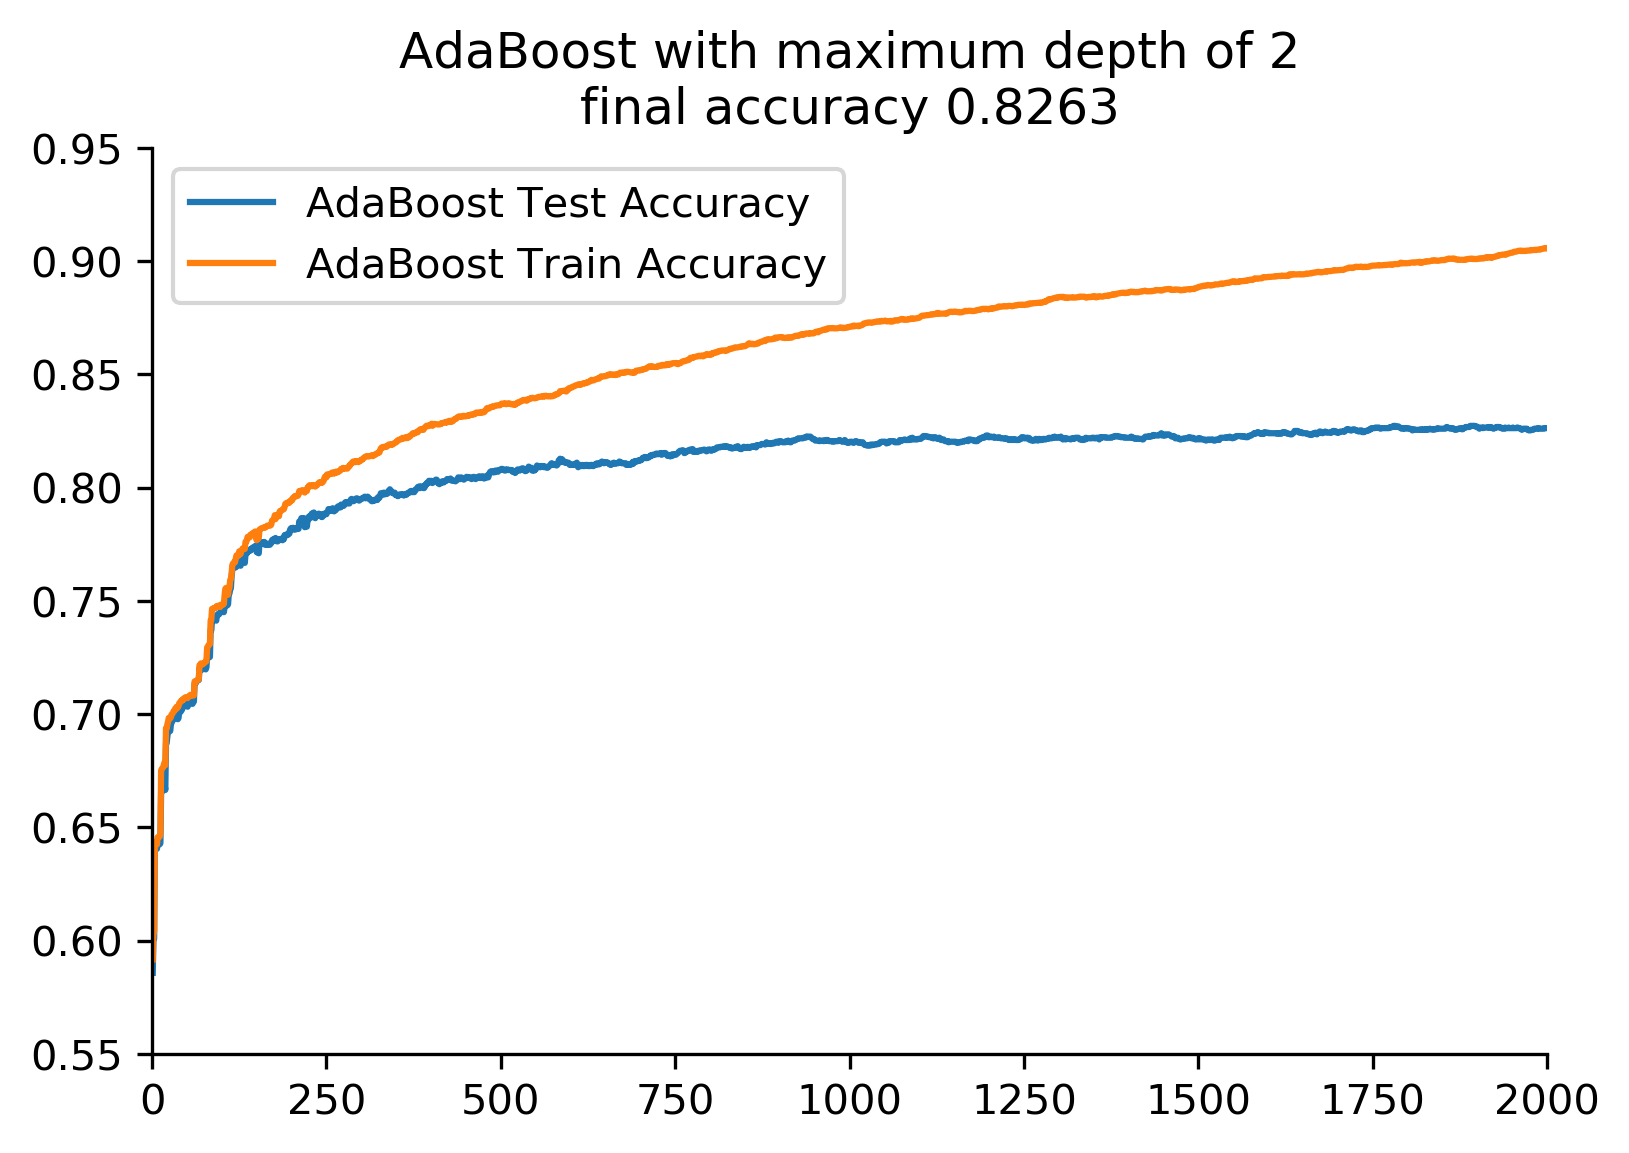

In [39]:
plot_ada_hist(ada2, 'AdaBoost with maximum depth of 2\nfinal accuracy %.4f'
             %ada2.score(x_test, y_test))